<a href="https://colab.research.google.com/github/mwezeray/OpenAnalyst/blob/main/Titanic_Survival_Predictor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Survival Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [19]:
df = pd.read_csv('train.csv')

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

/tmp/ipython-input-2081857410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='pastel')


([<matplotlib.axis.XTick at 0x78dd4f6ea930>,
 [Text(0, 0, 'Died'), Text(1, 0, 'Survived')])

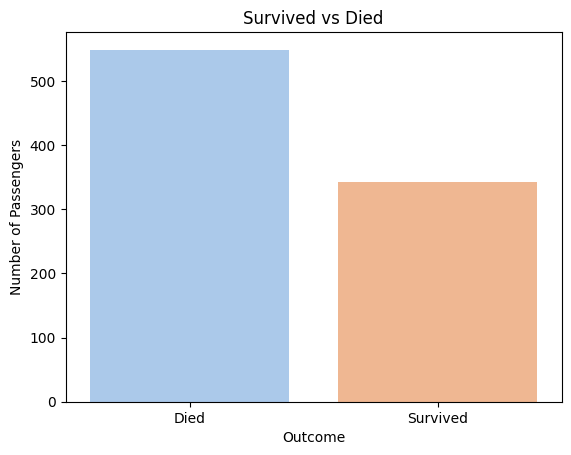

In [4]:
# How many survived vs how many died
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title('Survived vs Died')
plt.xlabel('Outcome')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['Died', 'Survived'])
# plt.grid(True)

In [21]:
# Gender wise survival
male_data = df[df['Sex']=='male']
male_died = len(male_data[male_data['Survived']==0])
male_survived = len(male_data[male_data['Survived']==1])

In [22]:
female_data = df[df['Sex']=='female']
female_died = len(female_data[female_data['Survived']==0])
female_survived = len(female_data[female_data['Survived']==1])

Male Survival Count graph

Text(0, 0.5, 'Number of Males')

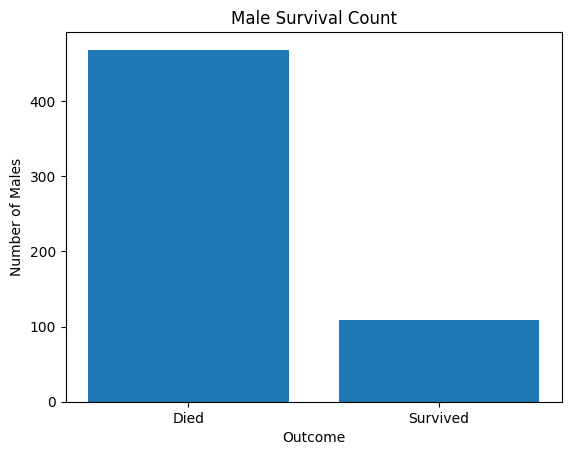

In [7]:
plt.bar(['Died', 'Survived'], [male_died, male_survived])
plt.title('Male Survival Count')
plt.xlabel('Outcome')
plt.ylabel('Number of Males')

Female Survival Count Graph

Text(0, 0.5, 'Number of Females')

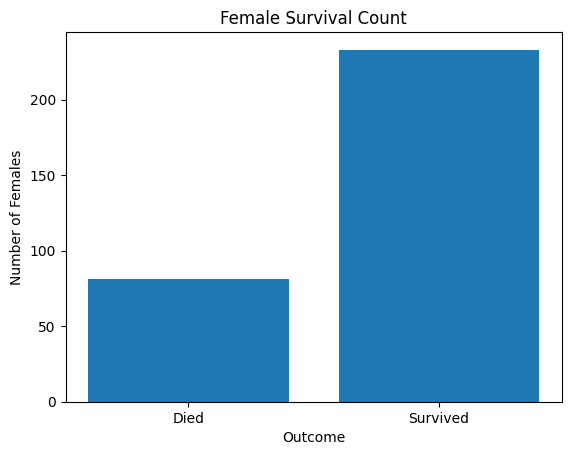

In [8]:
plt.bar(['Died', 'Survived'], [female_died, female_survived])
plt.title('Female Survival Count')
plt.xlabel('Outcome')
plt.ylabel('Number of Females')

In [ ]:
len(male_data)

577

In [ ]:
len(female_data)

314

Analysing data to drop irrelevant columns

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df = df.drop(columns=['PassengerId', 'Ticket', 'Name', 'Embarked', 'Cabin'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [25]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


Handling Missing Values

In [26]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [27]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,28.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


Using pd.dummies(), convert text labels into numerical inputs (Dummy/indicator variables (0s and 1s) to represent the presence of a category.

In [28]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [29]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True
887,1,1,19.0,0,0,30.0000,False
888,0,3,28.0,1,2,23.4500,False
889,1,1,26.0,0,0,30.0000,True


In [30]:
# Divide into input and output
X = df.drop(columns=['Survived'])
y = df['Survived']

In [31]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,True
1,1,38.0,1,0,71.2833,False
2,3,26.0,0,0,7.9250,False
3,1,35.0,1,0,53.1000,False
4,3,35.0,0,0,8.0500,True
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,True
887,1,19.0,0,0,30.0000,False
888,3,28.0,1,2,23.4500,False
889,1,26.0,0,0,30.0000,True


In [32]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [33]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [34]:
model.coef_

array([[-1.05148475, -0.0385151 , -0.33684089, -0.09597312,  0.00301133,
        -2.65040703]])

In [35]:
# Feature importance
df_impt = pd.DataFrame({'Feature':X.columns, 'Coefficients':model.coef_[0]}).sort_values(by='Coefficients')
df_impt

,Feature,Coefficients
5,Sex_male,-2.650407
0,Pclass,-1.051485
2,SibSp,-0.336841
3,Parch,-0.095973
1,Age,-0.038515
4,Fare,0.003011


/tmp/ipython-input-3392699032.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficients', y='Feature', data=df_impt, palette='coolwarm')


Text(0.5, 1.0, 'Feature Importance')

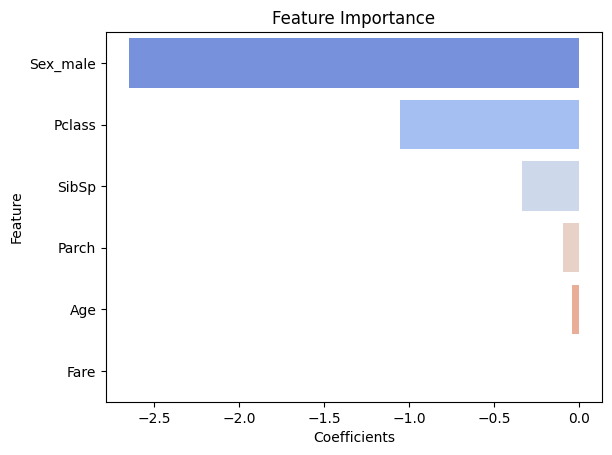

In [36]:
sns.barplot(x='Coefficients', y='Feature', data=df_impt, palette='coolwarm')
plt.title('Feature Importance')
